![texto_descriptivo](portada.jpg)

### Importamos los módulos necesarios para el proyecto

In [1]:
import pandas as pd
import seaborn as sb

### Cargamos el dataset

In [2]:
data = pd.read_csv("src/attacks.csv",encoding = "ISO-8859-1")

In [3]:
data.shape # antes de nada, nos hacemos una idea de lo que hay

(25723, 24)

In [1]:
# 1º hipotesis: los surferos provovan mas atáques que los surferos ( aqui me tengo que quedar con los provocados primero, y con los pescadores y surferos por otro)
#2º hipotesis : los hombres provocan mas ataques las mujeres ( aqui primero con los provocados, y con hombres y mujeres despues)
#3º hipotesis: en Florida ( que imagino que estará), hay más ataques de cualquier tipo que en Reunion, que he leido que es donde hay mas concentracion
                # cambio la segunda hipótesis, primero a Seychelles, porque Reunión no salía. Y después a Hawai, porque no seychelles solo tiene 1 ataque


In [396]:
data.head ()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [376]:
data.describe ()

,Year,original order
count,6300.000000,6309.000000
mean,1927.272381,3155.999683
std,281.116308,1821.396206
min,0.000000,2.000000
25%,1942.000000,1579.000000
50%,1977.000000,3156.000000
75%,2005.000000,4733.000000
max,2018.000000,6310.000000


In [259]:
data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

Después de echar un vistazo, vamos con las hipótesis


1º hipotesis: los surferos provovan mas atáques que los surferos ( aqui me tengo que quedar con los provocados primero, y con los pescadores y surferos por otro)

2º hipotesis : los hombres provocan mas ataques las mujeres ( aqui primero con los provocados, y con hombres y mujeres despues)

3º hipotesis: en Florida ( que imagino que estará), hay más ataques de cualquier tipo que en Reunion, que he leido que es donde hay mas concentración de tiburones. ( esta hipótesis la cambiaré durante el proceso.
           



In [3]:
data.dropna (how="all", inplace=True) #elimino filas con todos los valores NaN 1º metodo de limpieza, este será el unico filtro
                                      # que aplicaré al dataset inicial. Para los demás iré creando variables.

In [63]:
#y ahora reduciré el df para cada hipotesis, para la primera solo me interesan: 1º ataques provocados, y sexo
dfhipo1= data[[ "Type","Sex ", "Name"]] #el nombre lo he incluido después para buscar el valor n

In [64]:
dfhipo1.head ()

,Type,Sex,Name
0,Boating,F,Julie Wolfe
1,Unprovoked,F,Adyson McNeely
2,Invalid,M,John Denges
3,Unprovoked,M,male
4,Provoked,M,Gustavo Ramos


In [65]:
dfhipo1.shape 


(8703, 3)

In [66]:
# y Ahora columna a columna comprobando que los datos que contengan sean validos para hacer comprobaciones, 
# e intentando normalizar los valores en su caso, empiezo por el type, que es el condicionante principal:
dfhipo1.Type.unique ()


array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [67]:
dfhipo1a = dfhipo1 [dfhipo1.Type=="Provoked"] #me quedo solo con los provocados 2º método de limpieza

In [68]:
dfhipo1a ["Sex "].unique () #vemos que hay en sexo

array(['M', 'F', nan, 'N'], dtype=object)

In [69]:
#vemos que tenemos 4 valores, vamos a ver cuantos"N" tenemos y vemos qué hacemos con ellos

dfhipo1a ['Sex '].value_counts() # parece que son residuales, vamos a ver si podemos verlos por el nombre, 
                                    # si la lista hubiera sido inabarcable, habria aplicado la media para rellenarlos



M    494
F     22
N      1
Name: Sex , dtype: int64

In [70]:
dfhipo1a [dfhipo1a["Sex "]. isin (["N"])] # stephen parece hombre


,Type,Sex,Name
6131,Provoked,N,Stephen Pettigew


In [71]:
dfhipo1a ["Sex "].replace ({"N" : "M"}, inplace=True) #lo reemplazo 3º metodo limpieza

C:\Users\asiok\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [72]:
dfhipo1a ["Sex "].value_counts () #1º hipotesis , sigo con las hipotesis y luego me pondré a hacer graficos

M    495
F     22
Name: Sex , dtype: int64

Con esto quedaría validada la primera hipótesis, los hombres provocan más ataques que las mujeres.

<AxesSubplot:xlabel='Sex ', ylabel='count'>

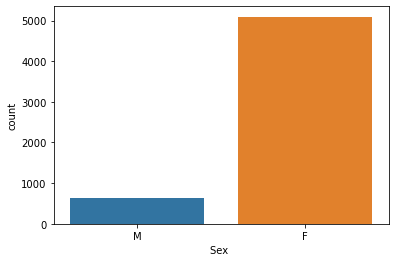

In [391]:
#aquí voy viendo las imagenes y las guardo para el archivo de visualización
imagengenero = sb.countplot (x=dfhipo1a ["Sex "])
imagengenero

<AxesSubplot:xlabel='Sex ', ylabel='count'>

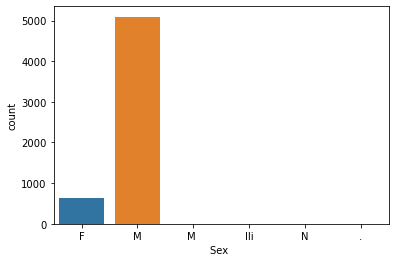

In [397]:
imagengenerosucia = sb.countplot (x=data ["Sex "])
imagengenerosucia

In [399]:
imagengenero.figure.savefig ("imagengenero.jpg", dpi=500)
imagengenerosucia.figure.savefig ("imagengenerosucia.jpg", dpi=500)

In [5]:
# para la segunda, en principio voy a hacer lo mismo que en la anterior:
dfhipo2= data [[ "Type", "Activity"]]

In [9]:
dfhipo2a = dfhipo2 [dfhipo2.Type == "Provoked"]

In [10]:
dfhipo2a.fillna ( "nada" )

,Type,Activity
0,Boating,Paddling
1,Unprovoked,Standing
2,Invalid,Surfing
3,Unprovoked,Surfing
4,Provoked,Free diving
...,...,...
8698,nada,nada
8699,nada,nada
8700,nada,nada
8701,nada,nada


In [11]:
dfhipo2a.Activity.value_counts () # Aquí nos encontramos con el primer problema real, buscar strings, tras intentar regex,
                                  # e intentar el uso de filtros, doy con str.contains





Surfing                                                      971
Swimming                                                     869
Fishing                                                      431
Spearfishing                                                 333
Bathing                                                      162
                                                            ... 
Boat of the Resolution capsized in the breakers                1
S2F-1 airplane crashed immediately after carrier take-off      1
Fishing for pompano                                            1
Swimming along side N.E.L. vessel Saluda                       1
Bathing in 3' to 4' of water                                   1
Name: Activity, Length: 1532, dtype: int64

In [12]:
dfhipo2a [ dfhipo2a.Activity.str.contains ("Surf", na=False )] #na=False porque debe de haber algo que contenga nan que me impide avanzar
                                                             # en cualquier caso, con esto no va a ser suficiente, faltan las minúsculas.

,Type,Activity
2,Invalid,Surfing
3,Unprovoked,Surfing
15,Unprovoked,Surfing
16,Questionable,Surfing
19,Unprovoked,Surfing
...,...,...
5280,Unprovoked,Surfing
5406,Unprovoked,Surf bathing
6097,Unprovoked,Surfing
6143,Unprovoked,Surfing


In [13]:
dfhipo2b = dfhipo2a [dfhipo2a.Activity.str.contains ('surf|fish', case=False, na=False)]#el case obvia las mayusculas/minusculas
# https://www.analyticslane.com/2020/01/13/filtrado-de-cadenas-de-texto-en-dataframe-con-pandas/ 4º metodo
# Con esta linea me quedo solo con las filas que contengan surf o fish

In [250]:
#ahora para seguir reduciendo, vamos a ver si puedo simplificar las actividades a surf y fishing, probaremos con una función que no me saldrá
def reduciendo (x): #unica funcion de momento
    for item in x:
        if "surf" in x:
            return "Surfing"
        if "Surf" in x:
            return "Surfing"
        else:
            return "Fishing"


In [251]:
dfhipo2b ["Activity"] = dfhipo2b ["Activity"].apply (reduciendo) #modifico la columna con los nuevos valores

<ipython-input-251-6955f64cd5f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfhipo2b["Activity"]=dfhipo2b["Activity"].apply (reduciendo)


In [254]:
dfhipo2b.Activity.value_counts() #y también dejamos los graficos para luego

Fishing    324
Surfing     23
Name: Activity, dtype: int64

La segunda hipótesis queda falsada, los pescadores provocan mas ataques.

<AxesSubplot:xlabel='Activity', ylabel='count'>

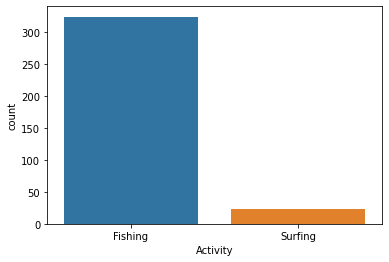

In [385]:
imagenactividad = sb.countplot ( x=dfhipo2b.Activity)
imagenactividad

In [388]:
imagenactividad.figure.savefig ("imagenactividad.jpg", dpi=500)

C:\Users\asiok\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\asiok\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\asiok\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\asiok\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


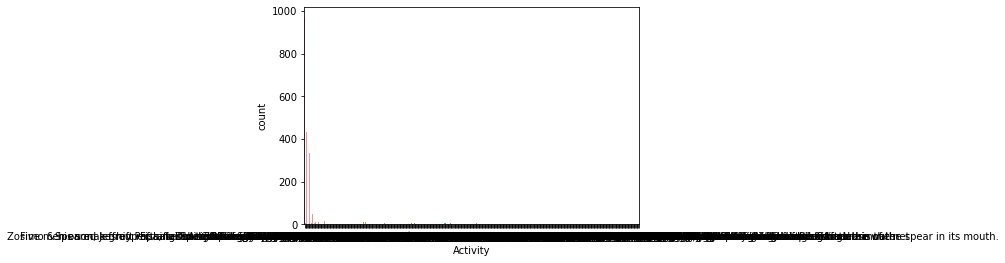

In [14]:
imagenactividadsucia = sb.countplot( x=dfhipo2a.Activity)
imagenactividadsucia.figure.savefig( "imagenactividadsucia.jpg", dpi=500)

In [21]:
imagenactividadsucia.figure.savefig ("imagenactividadsucia.jpg", dpi=500)

C:\Users\asiok\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\asiok\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


Vamos con la 3º hipotesis: en Florida ( que imagino que estará), hay más ataques de cualquier tipo que en Reunion, que he leido que es donde hay mas concentracion

In [299]:
data2.sample (50)

,Country,Area,Location
4353,MEXICO,Baja California,NaN
5626,HAITI,Off Cape Haitien,NaN
3434,DOMINICAN REPUBLIC,NaN,NaN
265,USA,South Carolina,"Folly Beach, Charleston County"
6166,INDIA,West Bengal,Hooghly River mouth
968,USA,Palmyra Atoll,NaN
3701,NEW ZEALAND,South Island,"Ngatuka Bay, near Picton"
3048,SOUTH AFRICA,Eastern Cape Province,Nahoon
208,USA,Oregon,"Indian Beach, Ecola State Park, Clatsop County"
3773,MOZAMBIQUE,NaN,"Limpopo River, 547 km from the sea"


Primero nos quedaremos con las columnas que nos pueden interesar y luego buscaremos los valores Florida y Reunión en ellos, como dije antes, cambiaremos la hipótesis a mitad del camino, primero a Seychelles y luego a Hawaii.

In [17]:
data2= data [["Country", "Area", "Location"]] #nos quedamos solo con las que nos pueden interesar

In [293]:
data2.head ()

,Country,Area,Location
0,USA,California,"Oceanside, San Diego County"
1,USA,Georgia,"St. Simon Island, Glynn County"
2,USA,Hawaii,"Habush, Oahu"
3,AUSTRALIA,New South Wales,Arrawarra Headland
4,MEXICO,Colima,La Ticla


In [18]:
data2.dropna (how="all", inplace=True)

<ipython-input-18-3b1863f54051>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.dropna (how="all", inplace=True)


In [266]:
data2.shape

(6273, 3)

In [275]:
data2.Area.unique ()

array(['California', 'Georgia', 'Hawaii', 'New South Wales', 'Colima',
       'Pernambuco', 'Florida', 'Queensland', 'South Carolina',
       'Cornwall', 'Westerm Australia', 'Eastern Cape Province',
       'Hua Hin', 'Cocos Island', 'Western Australia',
       'Alifu Alifu Atoll', 'Western Cape Province', 'New Providence',
       'Alagoas', nan, 'Victoria', 'KwaZulu-Natal',
       'Boi Island, Victoria', 'Galapagos Islands', 'Fernando de Noronha',
       'Sepang', 'Holquin Province', 'Pamplemousses ', 'South Australia',
       'North Island', 'New York', 'Canary Islands', ' Upolu Island',
       'Shizuoka Prefecture', 'Texas', 'Castellón', 'Massachusetts',
       'Red Sea Protectorate', 'New Providence District',
       '40 miles off Grand Bahama Island', 'Ascension Island',
       'New Jersey', 'Majorca', 'Washington', 'Tabasco', 'Anjouan',
       'Ibiza Island', 'Marquesas', 'South Devon', 'New Providence ',
       'Sharjah, ', 'Baja California Sur', 'Saint-Leu', 'South Island',
   

In [280]:
"reunion" in data2["Area"].unique () #y a buscar

False

In [286]:
"reunión" in data2.Country.unique ()

False

In [288]:
"reunión" in data2.Location.unique () #vamos a cambiar la hipótesis a Seychelles, que reunión no aparece...

False

In [291]:
"Seychelles" in data2["Location"].unique ()

False

In [307]:
"Seychelles" in data2["Country"].unique ()# amplio al pais, que parece que solo aparece en country

False

In [308]:
"Florida" in data2.Area.unique() 

True

In [297]:
"Florida" in data2.Location.unique() #location nos va a sobrar

False

In [317]:
data2a=data2.drop (["Location"], axis=1) #5º metodo 

In [304]:
data2a

,Country,Area
0,USA,California
1,USA,Georgia
2,USA,Hawaii
3,AUSTRALIA,New South Wales
4,MEXICO,Colima
...,...,...
6297,AUSTRALIA,Western Australia
6298,AUSTRALIA,Western Australia
6299,USA,North Carolina
6300,PANAMA,NaN


In [318]:
#florida en area y seychelles en country, usamos el loc para filtrar

data2a = data2a.loc[(data2a["Area"] == "Florida") | (data2a["Country"] == "Seychelles")] 

In [331]:
data2a.Country.value_counts() # esto tenía sentido pensando que en seychelles habia leido que tenia tiburones

USA           1037
Seychelles       1
Name: Country, dtype: int64

In [369]:
# cambio la hipótesis a hawai, vamos a buscarlo
"Hawaii" in data2.Area.unique()

True

In [352]:
"Hawaii" in data2.Location.unique()

True

In [353]:
"Hawaii" in data2.Country.unique()

False

In [350]:
data2.Location.value_counts()

New Smyrna Beach, Volusia County          163
Daytona Beach, Volusia County              30
Ponce Inlet, Volusia County                20
Melbourne Beach, Brevard County            18
Myrtle Beach, Horry County                 17
                                         ... 
Smelting Works Bay near Hobart              1
Noyes Beach                                 1
Lavalette, Ocean County                     1
St. Kilda Beach                             1
Reeds Bay, Brigantine, Atlantic County      1
Name: Location, Length: 4108, dtype: int64

In [351]:
data2.Area.value_counts()

Florida                               1037
New South Wales                        486
Queensland                             311
Hawaii                                 298
California                             290
                                      ... 
Cyclades archipelago                     1
Grand Baie                               1
Grand Cayman                             1
Near the Andaman & Nicobar Islands       1
Naples Province                          1
Name: Area, Length: 825, dtype: int64

In [373]:
data2h = data2.loc[(data2["Area"] == "Florida") | (data2["Area"] == "Hawaii")] #con el loc nos quedamos solo con las que nos interesan

In [374]:
data2h

,Country,Area,Location
2,USA,Hawaii,"Habush, Oahu"
7,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County"
8,USA,Florida,"Cocoa Beach, Brevard County"
9,USA,Florida,"Daytona Beach, Volusia County"
25,USA,Hawaii,"Shipwrecks Beach, Keoneloa Bay, Kauai"
...,...,...,...
6232,USA,Hawaii,"Portlock, Oahu"
6233,USA,Florida,"Mosquito Inlet (Ponce Inlet), Volusia County"
6249,USA,Florida,"Palm Beach, Palm Beach County"
6283,USA,Florida,"Gadsden Point, Tampa Bay"


In [375]:
data2h.Area.value_counts ()

Florida    1037
Hawaii      298
Name: Area, dtype: int64

Y sí, la tercera hipótesis se valida, en Florida hay más ataques que en Hawaii ( y Seychelles)

Finalmente haré los gráficos, que son lo ultimo que hago aunque los haya colocado cada uno en su lugar, es una pena, pero por las hipótesis elegidas solo usaré countplot.

<AxesSubplot:xlabel='Area', ylabel='count'>

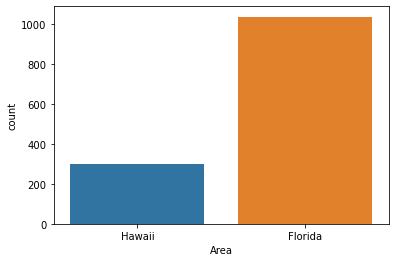

In [386]:

imagenzonas = sb.countplot ( x=data2h.Area)
imagenzonas

In [387]:
imagenzonas.figure.savefig ("imagenzonas.jpg", dpi=500)

<AxesSubplot:xlabel='Area', ylabel='count'>

C:\Users\asiok\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\asiok\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


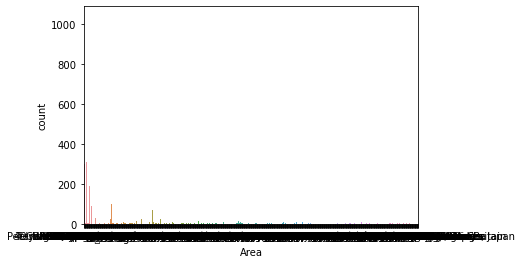

In [19]:
imagenzonassucia = sb.countplot( x=data2.Area)
imagenzonassucia

In [20]:
imagenzonassucia.figure.savefig ( "imagenzonassucia.jpg", dpi=500)